deadline: 02.February 2022 12 PM. 

general tasks for this assignment are:

  - Import the dataset and prepare the data for the models (preferably using an automated loop)
  - Prediction of 2 cryptocurrencies 
  - Generation of feature variables from the data sets
  - Design neural networks which fit the task you are facing (predicting the target variable)
  - Automatic optimization of the networks (for example with cross-validation, hyperparameter tuning, etc.)

dataset: [Kaggle](https://www.kaggle.com/c/g-research-crypto-forecasting)

For prediction our team chose the cryptocurrencies Bitcoin and Ethereum.






# Team information

|Team-number :| 15|
|:----:|:----:|


|Name|    E-Mail        |matriculation-nr.|
|:----:|:----:|:----:|
|Usmani Sababa Saad| usmani01@ads.uni-passau.de|109409|
|Stegner Maria| stegne03@uni-passau.de|107552|
|Michael Haas| haas38@ads.uni-passau.de|78887|

# Data Import

In the following chapter we will import the basic data set. 

To do so we are using: 

> The os package, which provides a portable way of using operating system dependent functionality. This is necessary as we are going to manipulate file paths in order to read the data.

> The numpy packge, which provides operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, basic linear algebra and much more. We use this in this section especially to define datatypes for our datasample.

> The pandas package, which is usually used for data analysis and manipulation. This package allows us to read the csv file, to transform our index into datetime format and to merge different datasets.

In the first step we need to import the data by using pandas. Therefore we initially set the directory variable to the folder that contains our data and afterwards use os.path.join to join the dataset_name with the directory link. Before reading the dataset we define the datatypes using np.int and np.float, then we read the csv data and pass the datatypes to the dtype parameter. 

Since the timestamps are in seconds since the first of january 1970, we create a column in our datasample that contains the date in a datetime format. 

After preparing the dataset with the training data we also read the asset_details with pandas in the same fashion as before.

In the end we merge both dataframes on the basis of the Asset_ID column. 

As a first step, we import the files "train.csv" and "asset_details.csv", transform them into a pandas dataframe and in the end merge them.
To do so we are using three packages, which we import in the beginning in order to be able to work with them:
> The os package, which provides a portable way of using operating system dependent functionality. This is necessary as we are going to manipulate file paths in order to read the data.

> The numpy packge, which provides operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, basic linear algebra and much more.

> The pandas package, which is usually used for data analysis and manipulation. This package allows us to read the csv file, to transform our index into datetime format and to merge different datasets.



In [1]:
import os
import numpy as np
import pandas as pd

#import data
directory = "/Users/mariastegner/Documents/Master/1. Semester" 
file_path = os.path.join(directory, 'train.csv')
dtypes={
    'timestamp': np.int64,
    'Asset_ID': np.int8,
    'Count': np.int32,
    'Open': np.float64,
    'High': np.float64,
    'Low': np.float64,
    'Close': np.float64,
    'Volume': np.float64,
    'VWAP': np.float64,
    'Target': np.float64,
}
data = pd.read_csv(file_path, dtype=dtypes, usecols=list(dtypes.keys()))
data ['Time']=pd.to_datetime(data['timestamp'], unit='s')

file_path = os.path.join(directory, 'asset_details.csv')
details = pd.read_csv(file_path)

data = pd.merge(data, 
                details, 
                on ="Asset_ID",
                how = 'left')

In [2]:
data.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,Weight,Asset_Name
0,1514764860,2,40,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00,2.397895,Bitcoin Cash
1,1514764860,0,5,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 00:01:00,4.304065,Binance Coin
2,1514764860,1,229,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00,6.779922,Bitcoin
3,1514764860,5,32,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 00:01:00,1.386294,EOS.IO
4,1514764860,7,5,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 00:01:00,2.079442,Ethereum Classic


# Data Preprocessing 

As specified in the task, we split the dataset to only work with the data up to 2021-05-31 23:59:00. The remaining data, starting at 2021-06-01 00:00:01, is later used to predict and evaluate the models. To do so we specified a dataset called "data_eval", containing the data starting from the timestamp 1622505660 of the original dataframe "data", and respecified the dataset "data" as all the entries of the original dataset before the timestamp 1622505660. Looking at the last entry of the dataframe "data" by applying the tail function and the first entry of the dataframe "data_eval" by applying the head function, it becomes apparent that one minute is missing, namely the one corresponding to the timestamp 1622505600. Without this gap, the dataframe "data" would contain the data up until 2021-06-01 00:00:00.  

In [3]:
data_eval = data[data.timestamp >= 1622505660]
data = data[data.timestamp < 1622505660]

In [4]:
data.tail(1)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,Weight,Asset_Name
21979818,1622505540,11,75,272.735,273.08,272.14,272.375,52.787542,272.485891,-0.003017,2021-05-31 23:59:00,1.609438,Monero


In [5]:
data_eval.head(1)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,Weight,Asset_Name
21979819,1622505660,3,2787,1.727959,1.7414,1.7259,1.739664,1.450042e+06,1.734166,0.005143,2021-06-01 00:01:00,4.406719,Cardano


In order to create models for the two currencies, we then create two separate datasets for the currencies to be predicted. The dataset for Bitcoin, called "btc", is specified as all the rows from the dataset "data" corresponding to Asset ID 1, while the one for Ethereum, called "eth", is specified as all the rows from the dataset "data" corresponding to Asset ID 6. Furthermore, for both datasets the timestamp is set as the index in order to be able to identify gaps within the datasets.  

In [6]:
btc=data[data["Asset_ID"]==1]
btc=btc.set_index("timestamp")
btc.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,Weight,Asset_Name
timestamp,,,,,,,,,,,,
1514764860,1,229,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00,6.779922,Bitcoin
1514764920,1,235,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,2018-01-01 00:02:00,6.779922,Bitcoin
1514764980,1,528,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,2018-01-01 00:03:00,6.779922,Bitcoin
1514765040,1,435,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,2018-01-01 00:04:00,6.779922,Bitcoin
1514765100,1,742,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,2018-01-01 00:05:00,6.779922,Bitcoin


Because missing asset data for a given minute is not represented by NaN's, but instead by the absence of these rows, the is_na function cannot be applied to identify them. Instead, as mentioned above, the new index can now be used to find missing rows by checking the timestamp difference between consecutive rows. This is done by subtracting the previous index from the current index, starting at the second index, i.e., at location 1, and ending at the last. The result of this calculation should always be 60 as the timestamps are supposed to be one minute, i.e., 60 seconds, apart. However, in the output of this code it can be observed that for the Bitcoin data this is not the case as the value_counts function counted 74 occurrences with a time difference of 120 seconds, so one missing minute, 12 occurrences with a time difference of 180 seconds, so two missing minutes, and so on. The same is done for Ethereum for which we could also identify missing data.   

In [7]:
(btc.index[1:]-btc.index[:-1]).value_counts().head()

60     1794863
120         74
180         12
240         11
420          9
Name: timestamp, dtype: int64

In [8]:
eth=data[data["Asset_ID"]==6]
eth=eth.set_index("timestamp")
eth.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,Weight,Asset_Name
timestamp,,,,,,,,,,,,
1514764860,6,173,738.3025,746.00,732.51,738.5075,335.987856,738.839291,-0.004809,2018-01-01 00:01:00,5.894403,Ethereum
1514764920,6,192,738.5075,745.14,732.49,738.2600,232.793141,738.268967,-0.004441,2018-01-01 00:02:00,5.894403,Ethereum
1514764980,6,120,738.3325,745.12,730.00,737.5025,174.138031,737.994457,-0.004206,2018-01-01 00:03:00,5.894403,Ethereum
1514765040,6,156,737.2225,744.69,728.93,737.1025,165.383926,737.303631,-0.002205,2018-01-01 00:04:00,5.894403,Ethereum
1514765100,6,118,736.5300,743.80,727.11,735.7050,193.078039,736.163026,-0.001744,2018-01-01 00:05:00,5.894403,Ethereum


In [9]:
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60     1794770
120         96
180         23
300          5
540          4
Name: timestamp, dtype: int64

In order to make the two datasets usable for a time series model, we preprocess them into a format without time gaps. For this we use the reindex function to respecifie the datasets as the reindexed versions of them. The new indices are set to be in a range from the first index of the dataset to the last plus 60 (as we already saw that at the end of the dataset there was one minute missing). In order to guarantee that there is a time difference of 60 seconds between consecutive rows the step-width of the range is set to 60. As a method to fill holes in the reindexed dataframe the "pad"-method is chosen which propagates the last valid observation forward to the next valid. 
When checking for missing rows again, we can now see that all of the time differences account to 60.

In [10]:
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')

In [11]:
(btc.index[1:]-btc.index[:-1]).value_counts().head()

60    1795678
Name: timestamp, dtype: int64

In [12]:
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60    1795678
Name: timestamp, dtype: int64

Now that we got rid of missing rows, we look for the sum of NaN values within the columns by applying the isna function and the sum function. We can see that for both currencies there are missing values in the column "Target". As this column is our target variable we apply the dropna function to delete the rows with missing values. 

In [13]:
btc.isna().sum()

Asset_ID        0
Count           0
Open            0
High            0
Low             0
Close           0
Volume          0
VWAP            0
Target        921
Time            0
Weight          0
Asset_Name      0
dtype: int64

In [14]:
eth.isna().sum()

Asset_ID         0
Count            0
Open             0
High             0
Low              0
Close            0
Volume           0
VWAP             0
Target        1040
Time             0
Weight           0
Asset_Name       0
dtype: int64

In [15]:
btc.dropna(inplace=True)
eth.dropna(inplace=True)

In [16]:
btc_eval = data_eval[data_eval["Asset_ID"]==1]
btc_eval = btc_eval.set_index('timestamp')
eth_eval = data_eval[data_eval["Asset_ID"]==6]
eth_eval = eth_eval.set_index('timestamp')

In [17]:
btc_eval = btc_eval.reindex(range(btc_eval.index[0],btc_eval.index[-1]+60,60),method='pad')
eth_eval = eth_eval.reindex(range(eth_eval.index[0],eth_eval.index[-1]+60,60),method='pad')

In [20]:
btc_eval.dropna(inplace=True)
eth_eval.dropna(inplace=True)

As a last step of data preprocessing, we split the two datasets into training and test data with a training fraction of 70%. This is done by specifying training sizes for both datasets as the length of the datasets multiplied with the training fraction. As this computation is likely to deliver a decimal number the np.floor function is applied on the result in order to obtain the floor of it. The output of this is then transformed to an integer by using the int function, and can therefore now be used as an input for the index in the last two rows. This procedure of splitting the data is solely done at this step in order to create all of the ta-features, the actual splitting is later done by a Time Series Split. The reason for creating the features for the split datasets is that for the whole Bitcoin and Ethereum datasets the generation of the features took way too long and for the splits it only took a few hours.

In [27]:
from sklearn.model_selection import train_test_split

btc_train, btc_test = train_test_split(btc, test_size=0.3, train_size=0.7, shuffle=False)
eth_train, eth_test = train_test_split(eth, test_size=0.3, train_size=0.7, shuffle=False)

# Feature Engineering 

For generating features for the two assets, we made use of ta which is a Technical Analysis Library for financial time series datasets. To do so, we first installed ta and then imported it. 
In a second step, we respecified the datasets btc_train, btc_test, eth_train and eth_test with the ta.add_all_ta_features function, which adds all the features contained in the Technical Analysis Library to the dataframe specified as the first argument. Further arguments required for the generation of the features are open, close, high, low and volume. Additionally, we set fillna to False so that NaN values will not be filled. 

After generating the features, we merge the datasets btc_train and btc_test to a new dataframe btc_ by applying the merge function. The argument how ='outer' ensures that the two datasets are merged by using union keys from both frames, i.e., by joining them by rows. The same is also done for Ethereum. As we can see when looking at the two new datasets, the last entry from the respective training data has no NaN values whereas the first few entries of the respective test data have a lot of NaN values. This is due to a lot of the features requiring a lookback window for computation, which is why we only use the datasets btc_ and eth_ to select the 20 best ta-features. Those features are then recomputed for the datasets btc and eth in order to avoid missing values in the middle of the dataset. 

In [28]:
!pip install ta

In [29]:
import ta

btc_train = ta.add_all_ta_features(btc_train, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=False)

/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_adi"] = AccDistIndexIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_obv"] = OnBalanceVolumeIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [30]:
btc_test = ta.add_all_ta_features(btc_test, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=False)

/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_adi"] = AccDistIndexIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_obv"] = OnBalanceVolumeIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [122]:
btc_eval = ta.add_all_ta_features(btc_eval, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=False)

/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


KeyboardInterrupt: 

In [34]:
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low

log_return = lambda asset: np.log(asset).diff(periods=1)

def create_features(df):
    df['close_1'] = df.Close.diff()
    df['close_15'] = df.Close.diff(15)
    df['close_60'] = df.Close.diff(60)

    df['count_1'] = df.Count.diff()
    df['count_15'] = df.Count.diff(15)
    df['count_60'] = df.Count.diff(60)

    df['volume_1'] = df.Volume.diff()
    df['volume_15'] = df.Volume.diff(15)
    df['volume_60'] = df.Volume.diff(60)

    df['upper_shadow'] = upper_shadow(df)
    df['lower_shadow'] = lower_shadow(df)

    df['log_returns'] = log_return(df.Close)[:]

In [35]:
create_features(btc_train)
create_features(btc_test)
create_features(btc_eval)

<ipython-input-34-f70d6c605b93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_1'] = df.Close.diff()
<ipython-input-34-f70d6c605b93>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_15'] = df.Close.diff(15)
<ipython-input-34-f70d6c605b93>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [ ]:
btc_train_features = btc_train.drop(['Asset_ID', 'Time', 'Weight', 'Asset_Name'], axis=1)
btc_train_features = btc_train_features.drop(btc_train_features.columns[btc_train_features.isnull().sum()> 100], axis=1)

In [38]:
corr_features_btc = btc_train_features.corr()['Target'].abs().sort_values(ascending=False)
corr_features_btc[1:21]

Target                  1.000000
momentum_ppo_hist       0.046730
volatility_bbp          0.045919
trend_macd_diff         0.043595
trend_cci               0.042802
momentum_roc            0.041634
momentum_stoch_rsi      0.039351
momentum_rsi            0.038013
close_1                 0.036694
volatility_dcp          0.036094
momentum_stoch          0.035645
momentum_wr             0.035645
momentum_stoch_rsi_k    0.035545
volatility_kcp          0.035315
others_dlr              0.035171
log_returns             0.035171
close_15                0.034858
others_dr               0.033801
trend_stc               0.031498
trend_vortex_ind_pos    0.031201
momentum_stoch_rsi_d    0.030505
Name: Target, dtype: float64

In [40]:
btc_train_features = btc_train[list(corr_features_btc[:21].index)]
btc_train_features.head()

,Target,momentum_ppo_hist,volatility_bbp,trend_macd_diff,trend_cci,momentum_roc,momentum_stoch_rsi,momentum_rsi,close_1,volatility_dcp,...,momentum_wr,momentum_stoch_rsi_k,volatility_kcp,others_dlr,log_returns,close_15,others_dr,trend_stc,trend_vortex_ind_pos,momentum_stoch_rsi_d
timestamp,,,,,,,,,,,,,,,,,,,,,
1514764860,-0.014643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.509799,NaN,NaN,NaN,82.976947,NaN,NaN,NaN
1514764920,-0.015037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.074,NaN,...,NaN,NaN,0.471788,-0.159504,-0.001595,NaN,-0.159377,NaN,NaN,NaN
1514764980,-0.010309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.788,NaN,...,NaN,NaN,0.458106,-0.193909,-0.001939,NaN,-0.193721,NaN,NaN,NaN
1514765040,-0.008999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.274,NaN,...,NaN,NaN,0.432988,-0.241384,-0.002414,NaN,-0.241093,NaN,NaN,NaN
1514765100,-0.008079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43.126,NaN,...,NaN,NaN,0.397262,-0.313724,-0.003137,NaN,-0.313233,NaN,NaN,NaN


In [41]:
btc_test_features = btc_test[list(corr_features_btc[:21].index)]
btc_test_features.head()

,Target,momentum_ppo_hist,volatility_bbp,trend_macd_diff,trend_cci,momentum_roc,momentum_stoch_rsi,momentum_rsi,close_1,volatility_dcp,...,momentum_wr,momentum_stoch_rsi_k,volatility_kcp,others_dlr,log_returns,close_15,others_dr,trend_stc,trend_vortex_ind_pos,momentum_stoch_rsi_d
timestamp,,,,,,,,,,,,,,,,,,,,,
1590198000,0.000518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.456586,NaN,NaN,NaN,-65.796189,NaN,NaN,NaN
1590198060,0.000757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.680000,NaN,...,NaN,NaN,0.435629,-0.018179,-0.000182,NaN,-0.018177,NaN,NaN,NaN
1590198120,0.000598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.858571,NaN,...,NaN,NaN,0.353037,-0.052593,-0.000526,NaN,-0.052579,NaN,NaN,NaN
1590198180,0.000506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500767,NaN,...,NaN,NaN,0.394368,0.005422,0.000054,NaN,0.005422,NaN,NaN,NaN
1590198240,-0.000388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.040662,NaN,...,NaN,NaN,0.493545,0.032916,0.000329,NaN,0.032921,NaN,NaN,NaN


In [ ]:
btc_eval_features = btc_eval[list(corr_features_btc[:21].index)]
btc_eval_features.head()

In [42]:
btc_train_features.dropna(inplace=True)
btc_test_features.dropna(inplace=True)
btc_eval_features.dropna(inplace=True)

<ipython-input-42-301847dd8df1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_train_features.dropna(inplace=True)
<ipython-input-42-301847dd8df1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_test_features.dropna(inplace=True)


In [74]:
eth_train = ta.add_all_ta_features(eth_train, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=False)

/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_adi"] = AccDistIndexIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_obv"] = OnBalanceVolumeIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [75]:
eth_test = ta.add_all_ta_features(eth_test, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=False)

/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_adi"] = AccDistIndexIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_obv"] = OnBalanceVolumeIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [ ]:
eth_eval = ta.add_all_ta_features(eth_eval, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=False)

In [83]:
create_features(eth_train)
create_features(eth_test)
create_features(eth_eval)

<ipython-input-34-f70d6c605b93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_1'] = df.Close.diff()
<ipython-input-34-f70d6c605b93>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_15'] = df.Close.diff(15)
<ipython-input-34-f70d6c605b93>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [84]:
eth_train_features = eth_train.drop(['Asset_ID', 'Time', 'Weight', 'Asset_Name'], axis=1)
eth_train_features = eth_train_features.drop(eth_train_features.columns[eth_train_features.isnull().sum()> 100], axis=1)

In [86]:
corr_features_eth = eth_train_features.corr()['Target'].abs().sort_values(ascending=False)
corr_features_eth[1:21]

Target                  1.000000
momentum_roc            0.052268
volume_fi               0.043383
momentum_ppo            0.043092
momentum_ppo_hist       0.042921
Volume                  0.038949
Count                   0.036957
others_dlr              0.036848
log_returns             0.036848
volatility_kcp          0.034966
volatility_ui           0.033131
momentum_rsi            0.032701
momentum_ppo_signal     0.032107
count_60                0.031403
others_dr               0.031331
volatility_bbp          0.030985
volume_60               0.030371
trend_trix              0.030121
trend_vortex_ind_pos    0.029543
count_15                0.029501
trend_cci               0.029457
Name: Target, dtype: float64

In [87]:
eth_train_features = eth_train[list(corr_features_eth[:21].index)]
eth_train_features.head()

,Target,momentum_roc,volume_fi,momentum_ppo,momentum_ppo_hist,Volume,Count,others_dlr,log_returns,volatility_kcp,...,momentum_rsi,momentum_ppo_signal,count_60,others_dr,volatility_bbp,volume_60,trend_trix,trend_vortex_ind_pos,count_15,trend_cci
timestamp,,,,,,,,,,,,,,,,,,,,,
1514764860,-0.004809,NaN,NaN,NaN,NaN,335.987856,173,NaN,NaN,0.481530,...,NaN,NaN,NaN,140.372392,NaN,NaN,NaN,NaN,NaN,NaN
1514764920,-0.004441,NaN,NaN,NaN,NaN,232.793141,192,-0.033519,-0.000335,0.478657,...,NaN,NaN,NaN,-0.033514,NaN,NaN,NaN,NaN,NaN,NaN
1514764980,-0.004206,NaN,NaN,NaN,NaN,174.138031,120,-0.102659,-0.001027,0.467654,...,NaN,NaN,NaN,-0.102606,NaN,NaN,NaN,NaN,NaN,NaN
1514765040,-0.002205,NaN,NaN,NaN,NaN,165.383926,156,-0.054252,-0.000543,0.467782,...,NaN,NaN,NaN,-0.054237,NaN,NaN,NaN,NaN,NaN,NaN
1514765100,-0.001744,NaN,NaN,NaN,NaN,193.078039,118,-0.189774,-0.001898,0.438289,...,NaN,NaN,NaN,-0.189594,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
eth_test_features = eth_test[list(corr_features_btc[:21].index)]
eth_test_features.head()

,Target,momentum_ppo_hist,volatility_bbp,trend_macd_diff,trend_cci,momentum_roc,momentum_stoch_rsi,momentum_rsi,close_1,volatility_dcp,...,momentum_wr,momentum_stoch_rsi_k,volatility_kcp,others_dlr,log_returns,close_15,others_dr,trend_stc,trend_vortex_ind_pos,momentum_stoch_rsi_d
timestamp,,,,,,,,,,,,,,,,,,,,,
1590199320,0.001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.474864,NaN,NaN,NaN,-79.930082,NaN,NaN,NaN
1590199380,0.001666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391194,NaN,...,NaN,NaN,0.757254,0.187118,0.001871,NaN,0.187293,NaN,NaN,NaN
1590199440,-0.000131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140000,NaN,...,NaN,NaN,0.778102,0.066881,0.000669,NaN,0.066903,NaN,NaN,NaN
1590199500,-0.001275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.767940,NaN,...,NaN,NaN,1.202785,0.366065,0.003661,NaN,0.366736,NaN,NaN,NaN
1590199560,-0.001685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.302060,NaN,...,NaN,NaN,1.281334,0.143621,0.001436,NaN,0.143724,NaN,NaN,NaN


In [ ]:
eth_eval_features = eth_eval[list(corr_features_btc[:21].index)]
eth_eval_features.head()

In [89]:
eth_train_features.dropna(inplace=True)
eth_test_features.dropna(inplace=True)
eth_eval_features.dropna(inplace=True)

<ipython-input-89-49fec456554f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_train_features.dropna(inplace=True)
<ipython-input-89-49fec456554f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_test_features.dropna(inplace=True)


The selection of the ta-features is done by correlation, which is why we first create two new datasets btc_features_ and eth_features_. In these datasets the columns Asset_ID, Time, Weight, and Asset_Name are dropped because they cannot be used for correlation as three of them are asset-specific and correlating the time does not make sense. Furthermore, we delete the columns containing more than 100 NaN values in order to obtain features that have a sufficient number of entries for a good prediction. 

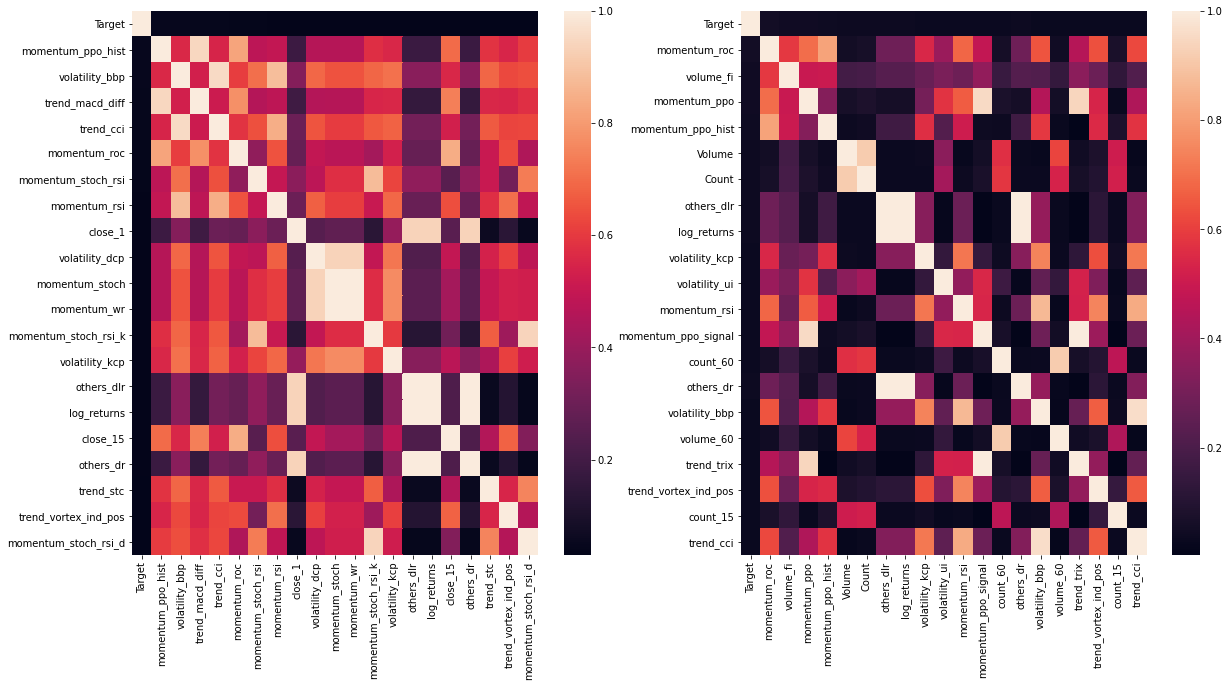

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize = (20, 10))
sns.heatmap(btc_train_features.corr().abs(), ax = axs[0])
sns.heatmap(eth_train_features.corr().abs(), ax = axs[1])
plt.show()

# Scaling of the Data

In [ ]:
X_btc_train = btc_train_features.drop(['Target'], axis = 1)
X_btc_test = btc_test_features.drop(['Target'], axis = 1)
X_btc_eval = btc_eval_features.drop(['Target'], axis = 1)

y_btc_train = btc_train_features['Target'].values
y_btc_test = btc_test_features['Target'].values
y_btc_eval = btc_eval_features['Target'].values

X_eth_train = eth_train_features.drop(['Target'], axis = 1)
X_eth_test = eth_test_features.drop(['Target'], axis = 1)
X_eth_eval = eth_eval_features.drop(['Target'], axis = 1)

y_eth_train = eth_train_features['Target'].values
y_eth_test = eth_test_features['Target'].values
y_eth_eval = eth_eval_features['Target'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler(feature_range = (0, 1))
X_btc_train_, X_btc_test_, X_btc_eval_ = X_scaler.fit_transform(X_btc_train), X_scaler.transform(X_btc_test), X_scaler.transform(X_btc_eval)

X_eth_train_, X_eth_test_, X_eth_eval_ = X_scaler.fit_transform(X_eth_train), X_scaler.transform(X_eth_test), X_scaler.transform(X_eth_eval)

# Hyperparameter Search

Now we use the Hyperparameter Search to optimize the parameters before specifying the NN.  We tune Model hyperparameters that influence model architecture (e.g., number and width of hidden layers) and algorithm hyperparameters that influence the speed and quality of training (e.g., learning rate and activation function). The number of hyperparameter combinations can grow insanely large causing a manual search for an optimal set simply not feasible nor scalable. Therefore we use Keras Tuner to automate the search. 

In [46]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

print(f"TensorFlow Version: {tf.__version__}")
print(f"KerasTuner Version: {kt.__version__}")
print(f"Keras Version: {keras.__version__}")

TensorFlow Version: 2.7.0
KerasTuner Version: 1.1.0
Keras Version: 2.7.0


In [68]:
# Number of epochs
NUM_EPOCHS = 5

input_shape= X_btc_train_.shape[1]

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 5
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 6)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu")
            )
        
        # Tune dropout layer with values from 0 - 0.3 with stepsize of 0.1.
        model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))
    
    # Add output layer.
    model.add(keras.layers.Dense(units=1, activation="softmax"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.MeanSquaredError(),
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

In [69]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective=kt.Objective("root_mean_squared_error", direction="min"),
                     max_epochs=5,
                     factor=3,
                     hyperband_iterations=10,
                     directory="kt_dir_btc",
                     project_name="kt_hyperband_btc")

# Display search space summary
tuner.search_space_summary()

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_btc_train_, y_btc_train, epochs=NUM_EPOCHS, batch_size = 100000, validation_data = (X_btc_test_, y_btc_test), callbacks=[stop_early], verbose=2)

# Get the optimal hyperparameters from the results
best_hps_btc=tuner.get_best_hyperparameters()[0]

Trial 101 Complete [00h 01m 56s]
root_mean_squared_error: 0.10033212602138519

Best root_mean_squared_error So Far: 0.0
Total elapsed time: 02h 22m 11s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hps_btc.values

In [98]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective=kt.Objective("root_mean_squared_error", direction="min"),
                     max_epochs=5,
                     factor=3,
                     hyperband_iterations=10,
                     directory="kt_dir_eth",
                     project_name="kt_hyperband_eth")

# Display search space summary
tuner.search_space_summary()

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_eth_train_, y_eth_train, epochs=NUM_EPOCHS, batch_size = 100000, validation_data = (X_eth_test_, y_eth_test), callbacks=[stop_early], verbose=2)

# Get the optimal hyperparameters from the results
best_hps_eth=tuner.get_best_hyperparameters()[0]

Trial 100 Complete [00h 03m 32s]
root_mean_squared_error: 0.10003623366355896

Best root_mean_squared_error So Far: 0.10003604739904404
Total elapsed time: 02h 44m 13s
INFO:tensorflow:Oracle triggered exit


In [99]:
best_hps_eth.values

{'num_layers': 6,
 'units_1': 384,
 'dropout_1': 0.2,
 'learning_rate': 0.001,
 'units_2': 320,
 'dropout_2': 0.0,
 'units_3': 96,
 'dropout_3': 0.0,
 'units_4': 320,
 'dropout_4': 0.2,
 'units_5': 224,
 'dropout_5': 0.30000000000000004,
 'tuner/epochs': 5,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

# Specification of the Optimized Model
use the parameters from the hyperparameter search

Epoch 1/5
13/13 - 13s - loss: 0.0102 - root_mean_squared_error: 0.1009 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1002 - 13s/epoch - 967ms/step
Epoch 2/5
13/13 - 12s - loss: 0.0101 - root_mean_squared_error: 0.1005 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001 - 12s/epoch - 897ms/step
Epoch 3/5
13/13 - 11s - loss: 0.0101 - root_mean_squared_error: 0.1005 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001 - 11s/epoch - 844ms/step
Epoch 4/5
13/13 - 16s - loss: 0.0101 - root_mean_squared_error: 0.1005 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001 - 16s/epoch - 1s/step
Epoch 5/5
13/13 - 14s - loss: 0.0101 - root_mean_squared_error: 0.1004 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001 - 14s/epoch - 1s/step


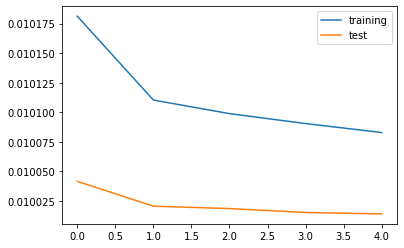

In [104]:
model_btc = build_model(best_hps_btc)
history = model_btc.fit(X_btc_train_, y_btc_train, epochs=NUM_EPOCHS, batch_size = 100000, validation_data = (X_btc_test_, y_btc_test), callbacks=[stop_early], verbose=2)
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

ValueError: x and y must be the same size

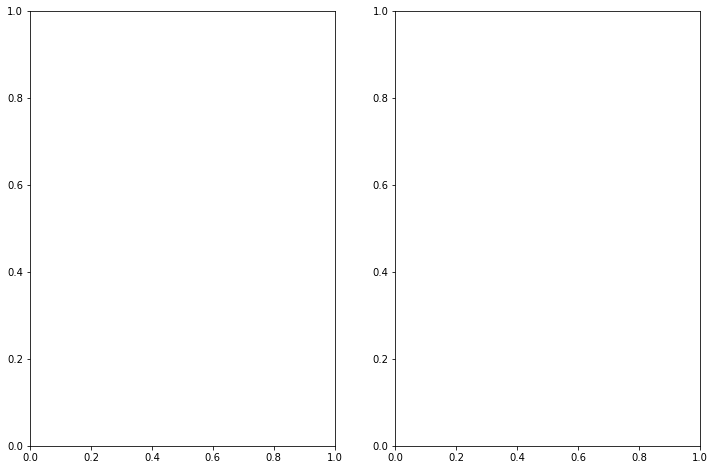

In [114]:
fig, axs = plt.subplots(1, 2, figsize = (12,8))

axs[0].scatter(model_btc.predict(X_btc_train_).flatten(), y_btc_train)
axs[1].scatter(model_btc.predict(X_btc_test_).flatten(), y_btc_test)
plt.show()
print(np.corrcoef(model_btc.predict(X_btc_train_).flatten(), y_btc_train)[0, 1])
print(np.corrcoef(model_btc.predict(X_btc_test_).flatten(), y_btc_test)[0, 1])

Epoch 1/5
13/13 - 52s - loss: 0.0100 - root_mean_squared_error: 0.1001 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1039 - 52s/epoch - 4s/step
Epoch 2/5
13/13 - 54s - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1032 - 54s/epoch - 4s/step
Epoch 3/5
13/13 - 78s - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1029 - 78s/epoch - 6s/step
Epoch 4/5
13/13 - 55s - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1028 - 55s/epoch - 4s/step
Epoch 5/5
13/13 - 52s - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1027 - 52s/epoch - 4s/step


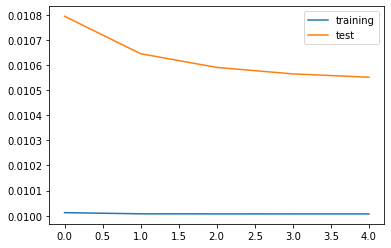

In [119]:
model_eth = build_model(best_hps_eth)
history = model_eth.fit(X_eth_train_, y_eth_train, epochs=NUM_EPOCHS, batch_size = 100000, validation_data = (X_eth_test_, y_eth_test), callbacks=[stop_early], verbose=2)
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

ValueError: x and y must be the same size

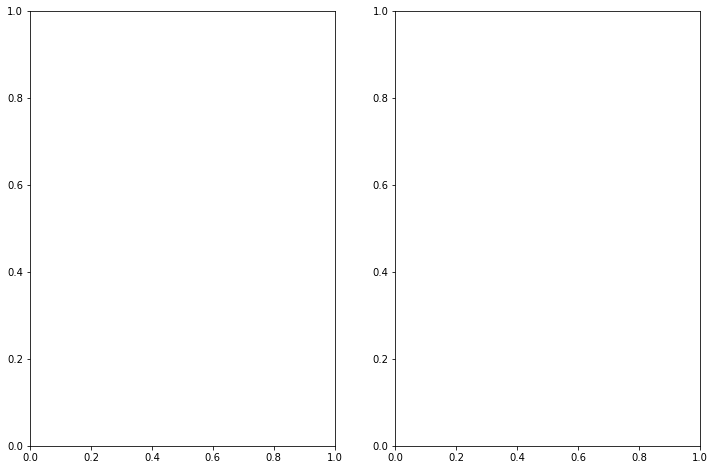

In [120]:
fig, axs = plt.subplots(1, 2, figsize = (12,8))

axs[0].scatter(model_eth.predict(X_eth_train_).flatten(), y_eth_train)
axs[1].scatter(model_eth.predict(X_eth_test_).flatten(), y_eth_test)
plt.show()
print(np.corrcoef(model_eth.predict(X_eth_train_).flatten(), y_eth_train)[0, 1])
print(np.corrcoef(model_eth.predict(X_eth_test_).flatten(), y_eth_test)[0, 1])

# Making forecasts with the optimized model

Now that we have generated our model we want to test our model performance.
Therefore we predict values with our model on the basis of our data_eval. Therefore we need to adjust our varible to the bitcon_eval. We then generate the same technical indicators as for the training and test data and then prepare the data for our prediction, this means excluding string columns and the target variable. Then to show the performance we use a scatterplot and calculate the correleation between the predicitons and the real values.

In [ ]:
plt.scatter(model_btc.predict(X_btc_eval_).flatten(), y_btc_eval)
plt.show()
print(np.corrcoef(model_btc.predict(X_btc_eval_).flatten(), y_btc_eval)[0, 1])

In [ ]:
plt.scatter(model_eth.predict(X_eth_eval_).flatten(), y_eth_eval)
plt.show()
print(np.corrcoef(model_eth.predict(X_eth_eval_).flatten(), y_eth_eval)[0, 1])

# Discussing the results

As we can see in our scatterplot our values of the prediction (x-axis) move on a far bigger span (-0.075 to 0.125) than the values of the real targets (-0.02 to 0.06). Additionally our predictions tend to be around -0.025 and -0.075 in most cases, values which are below the lowest real value. Meanwhile the real values tend to be between -0.02 and 0.02 most of the time. These differences in values are also confirmed by our correlation coefficient which is basically 0.02. (Here you should also go into far more detail regarding your results, as this is just an example for your understanding) .